In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5.keras'

# 分類数設定

In [5]:
NUM_CLASSES = 3

# 学習データ読み込み

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,103 (4.31 KB)

 Trainable params: 1,103 (4.31 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [14]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 22s 987ms/step - accuracy: 0.3359 - loss: 1.1685
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3006 - loss: 1.1937 - val_accuracy: 0.4576 - val_loss: 1.0613
Epoch 2/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2812 - loss: 1.1213
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3515 - loss: 1.1056 - val_accuracy: 0.4746 - val_loss: 1.0242
Epoch 3/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5078 - loss: 1.0478
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4447 - loss: 1.0666 - val_accuracy: 0.5165 - val_loss: 0.9858
Epoch 4/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4219 - loss: 1.0545
Epoch 4: saving model to model/keypoint_classifier/keypoint

In [17]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9667 - loss: 0.2052


In [18]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [19]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0.88793737 0.10977979 0.00228284]
0


# 混同行列

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


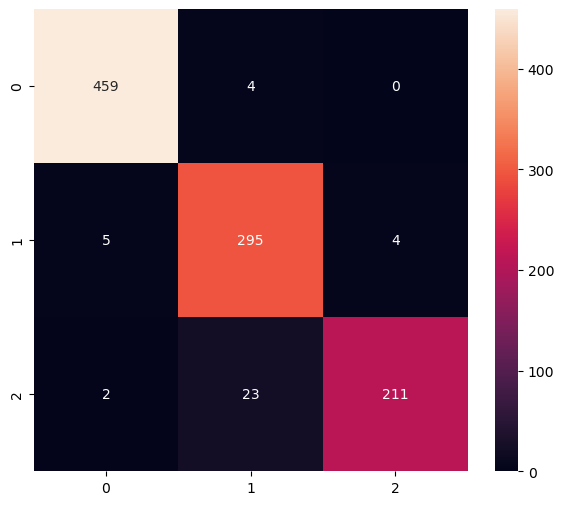

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       463
           1       0.92      0.97      0.94       304
           2       0.98      0.89      0.94       236

    accuracy                           0.96      1003
   macro avg       0.96      0.95      0.96      1003
weighted avg       0.96      0.96      0.96      1003



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [23]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [24]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\victus\AppData\Local\Temp\tmpevszm_0p\assets


INFO:tensorflow:Assets written to: C:\Users\victus\AppData\Local\Temp\tmpevszm_0p\assets


Saved artifact at 'C:\Users\victus\AppData\Local\Temp\tmpevszm_0p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1241309690768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1241309688080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1241330560528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1241330559760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1241330559184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1241330557840: TensorSpec(shape=(), dtype=tf.resource, name=None)


6492

# 推論テスト

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [27]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.88793725 0.10977983 0.00228285]
0
